<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Roc1_ODcnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

In [ ]:
os.listdir('/content/drive/MyDrive/optic cup images dataset')

['training set', 'validation set', 'testing set']

In [ ]:
import glob
largecup = glob.glob('/content/drive/MyDrive/optic cup images dataset/testing set/large cup/*.JPG')
print(len(largecup))
largecup[:5]


5


['/content/drive/MyDrive/optic cup images dataset/testing set/large cup/1ffa9498-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/optic cup images dataset/testing set/large cup/1ffa949e-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/optic cup images dataset/testing set/large cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/optic cup images dataset/testing set/large cup/1ffa9497-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/optic cup images dataset/testing set/large cup/1ffa9496-8d87-11e8-9daf-6045cb817f5b..JPG']

<ipython-input-4-2d1e5d958384>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


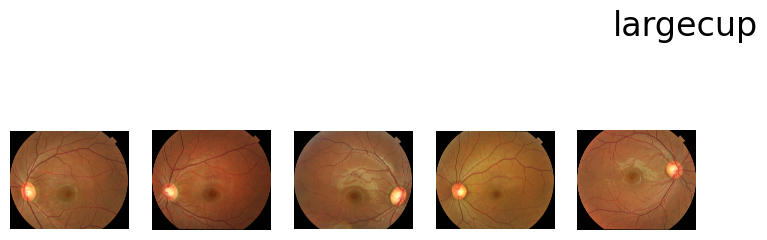

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('largecup', fontsize=24)

for ind, img_src in enumerate(largecup[:5]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = '/content/drive/MyDrive/optic cup images dataset/training set'
valimages = '/content/drive/MyDrive/optic cup images dataset/validation set'
testimages = '/content/drive/MyDrive/optic cup images dataset/testing set'

traindata = datagen.flow_from_directory(trainimages,
                                        target_size=(64,64),
                                        class_mode='binary')
valdata = datagen.flow_from_directory(valimages,
                                      target_size=(64,64),
                                      class_mode='binary')
testdata = datagen.flow_from_directory(testimages,
                                       target_size=(64,64),
                                       class_mode='binary')

Found 62 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense

model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
    Flatten(),
    Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 1)                 123009    
                                                                 
Total params: 123905 (484.00 KB)
Trainable params: 123905 (484.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(traindata,
          batch_size=32,
          epochs=10,
          validation_data=valdata)
model.save('ODcnn_model.keras')

Epoch 1/10
2/2 [==============================] - 5s 4s/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.6049 - val_accuracy: 0.7222
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 0.0678 - accuracy: 1.0000 - val_loss: 0.5526 - val_accuracy: 0.7222
Epoch 3/10
2/2 [==============================] - 4s 3s/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.4642 - val_accuracy: 0.7778
Epoch 4/10
2/2 [==============================] - 4s 3s/step - loss: 0.0628 - accuracy: 0.9839 - val_loss: 0.4849 - val_accuracy: 0.7222
Epoch 5/10
2/2 [==============================] - 5s 3s/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.6520 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 4s 3s/step - loss: 0.0486 - accuracy: 1.0000 - val_loss: 0.5999 - val_accuracy: 0.7222
Epoch 7/10
2/2 [==============================] - 6s 5s/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 0.4712 - val_accuracy: 0.7778
Epoch 8/10
2/2 [=========================

In [ ]:
y_pred = model.predict(testdata)

1/1 [==============================] - 0s 421ms/step


In [ ]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[5, 0],
       [0, 3]])

In [ ]:
y_true=testdata.classes

In [ ]:
print(metrics.classification_report(y_true, y_pred,
      target_names=['large cup','normal cup']))

              precision    recall  f1-score   support

   large cup       1.00      1.00      1.00         5
  normal cup       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
testdata.class_indices

{'large cup': 0, 'normal cup': 1}

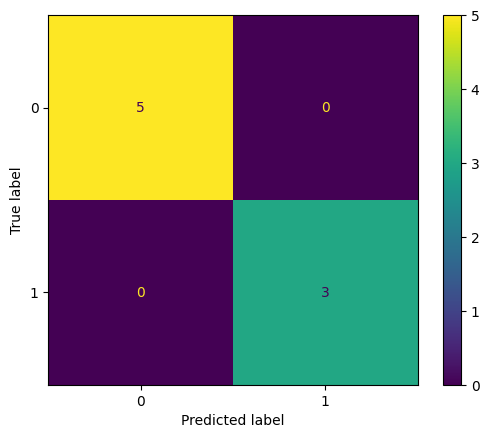

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

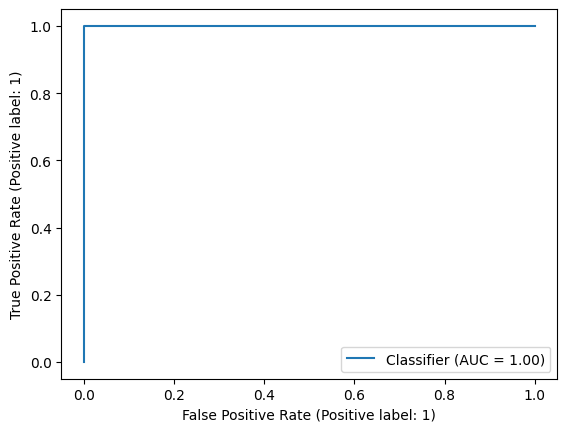

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

1/1 [==============================] - 0s 261ms/step
Prediction: large cup


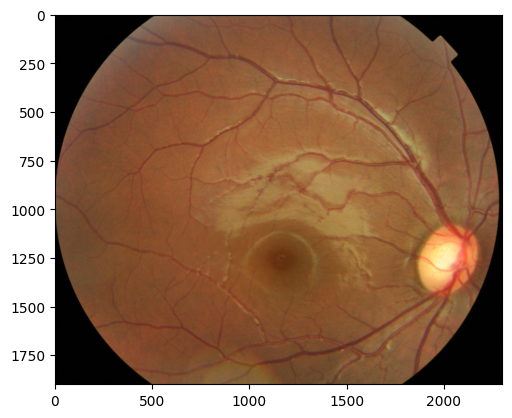

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/ODcnn_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64,3))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "normal cup"  # Example class names, modify as per your binary classes
    else:
        return "large cup"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/optic cup images dataset/testing set/large cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/optic cup images dataset/testing set/large cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 0s 42ms/step
Prediction: large cup


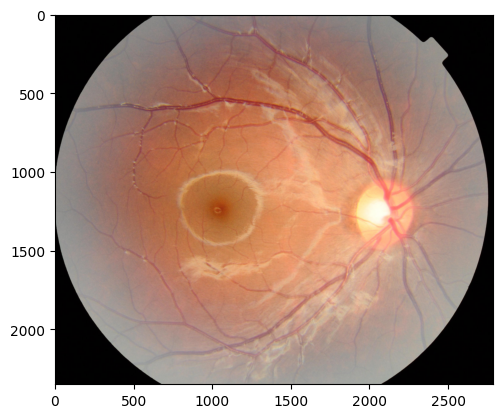

In [ ]:
unknown_image_path = "/content/drive/MyDrive/optic cup images dataset/testing set/normal cup/1ffa9657-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage1 = image.load_img('/content/drive/MyDrive/optic cup images dataset/testing set/normal cup/1ffa9657-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage1)
